In [37]:
import pandas as pd
import matplotlib.pyplot as plt

Učitavanje podataka za analizu

In [23]:
regular_season_results_df = pd.read_csv('data/regular_season_results.csv')
regular_season_results_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN
...,...,...,...,...,...,...,...,...
91219,S,132,592,61,640,60,N,0.0
91220,S,132,671,69,670,55,N,0.0
91221,S,132,779,65,825,61,N,0.0
91222,S,132,811,82,605,81,N,1.0


In [ ]:
tourney_seeds_df = pd.read_csv('data/tourney_seeds.csv')
tourney_seeds_df

In [ ]:
tourney_slots_df = pd.read_csv('data/tourney_slots.csv')
tourney_slots_df

Provjera null vrijednosti

In [ ]:
def data_has_null_values(
        df: pd.DataFrame
) -> pd.DataFrame:
    to_return = {}

    for column in df:
        to_return[column] = [sum(df[column].isna())]

    return pd.DataFrame(to_return)

In [ ]:
data_has_null_values(regular_season_results_df)

In [ ]:
data_has_null_values(tourney_slots_df)

In [ ]:
data_has_null_values(tourney_seeds_df)

Ispis oblika tablica

In [ ]:
regular_season_results_df.shape

In [ ]:
tourney_slots_df.shape

In [ ]:
tourney_seeds_df.shape

Stupci tablica

In [ ]:
regular_season_results_df.columns.values

In [ ]:
tourney_seeds_df.columns.values

In [ ]:
tourney_slots_df.columns.values

Opis tablica

Radi se samo za regular_season_result pošto ostale tablice nemaju numeričkih vrijednosti

In [33]:
regular_season_results_df.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


Ovdje su bitni stupci 'wscore' i 'lscore'.
Maksimalne vrijednosti navedenih tupaca se čine malo velike, ali nisu ne realne.

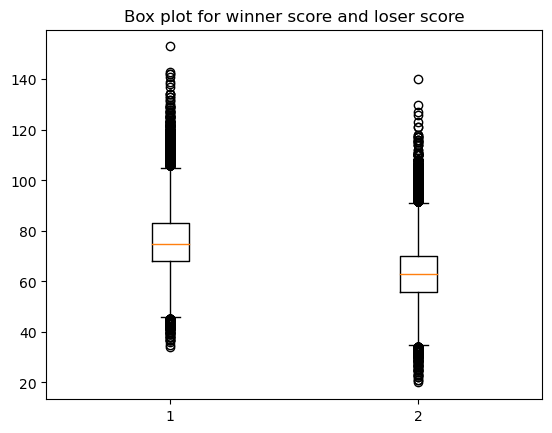

In [38]:
plt.boxplot(regular_season_results_df[['wscore', 'lscore']])
plt.title('Box plot for winner score and loser score')
plt.show()

Boxplot dijagram da postoji dosta outliera
Granice za outliere se mogu izračunati po sljedećim formulama:
IQR = Q3 - Q1
lower_limit = Q1 - 1.5IQR
upper_limit = Q3 + 1.5IQR

Vrijednosti Q1 i Q3 se mogu isčitati iz opisa tablice

In [39]:
WQ1 = 68.000000
WQ3 = 83.000000

WIQR = WQ3 - WQ1

winner_lower_limit = WQ1 - 1.5 * WIQR
winner_upper_limit = WQ3 + 1.5 * WIQR

print(f'{WIQR = }, {winner_lower_limit = }, {winner_upper_limit = }')

WIQR = 15.0, winner_lower_limit = 45.5, winner_upper_limit = 105.5


In [40]:
LQ1 = 56.000000
LQ3 = 70.000000

LIQR = WQ3 - WQ1

loser_lower_limit = LQ1 - 1.5 * LIQR
loser_upper_limit = LQ3 + 1.5 * LIQR

print(f'{LIQR = }, {loser_lower_limit = }, {loser_upper_limit = }')

LIQR = 15.0, loser_lower_limit = 33.5, loser_upper_limit = 92.5


S ovim granicama znamo koje podatke možemo odbaciti

In [41]:
winner_lower_count = len(regular_season_results_df.loc[regular_season_results_df['wscore'] < winner_lower_limit])
winner_upper_count = len(regular_season_results_df.loc[regular_season_results_df['wscore'] > winner_upper_limit])

print(f'{winner_lower_count = }, {winner_upper_count = }')

winner_lower_count = 157, winner_upper_count = 864


In [42]:
loser_lower_count = len(regular_season_results_df.loc[regular_season_results_df['lscore'] < loser_lower_limit])
loser_upper_count = len(regular_season_results_df.loc[regular_season_results_df['lscore'] > loser_upper_limit])

print(f'{loser_lower_count = }, {loser_upper_count = }')

loser_lower_count = 145, loser_upper_count = 668


In [45]:
print('Percentage of data removed:', (loser_upper_count + winner_lower_count) / len(regular_season_results_df) * 100, '%')

Percentage of data removed: 0.9043672717705866 %


Odbacivanjem podataka bi se izgubilo manje od 1% podataka.

Indikacija monotonosti

In [ ]:
regular_season_results_df.nunique()

In [ ]:
len(regular_season_results_df)

nunique ne indicira da postoje monotone vrijednosti

Prosiječni rezultat pobjedničkog time

In [34]:
regular_season_results_df[['wteam', 'wscore']].groupby('wteam').mean()

,wscore
wteam,
501,80.000000
502,68.675926
503,75.487730
504,75.311953
505,75.988372
...,...
852,75.611307
853,78.162228
854,71.842342


In [47]:
regular_season_results_df[['wteam', 'wscore']].groupby('wteam').median()

,wscore
wteam,
501,80.0
502,68.0
503,75.0
504,75.0
505,74.0
...,...
852,75.0
853,77.0
854,72.0


Prosiječni rezultat gubitničkog time

In [35]:
regular_season_results_df[['lteam', 'lscore']].groupby('lteam').mean()

,lscore
lteam,
501,61.368421
502,57.936027
503,65.055085
504,63.836134
505,62.493927
...,...
852,64.582375
853,65.432749
854,60.416667


In [48]:
regular_season_results_df[['lteam', 'lscore']].groupby('lteam').median()

,lscore
lteam,
501,60.0
502,58.0
503,63.5
504,63.0
505,62.0
...,...
852,65.0
853,65.0
854,60.0


In [49]:
regular_season_results_df[['season', 'wscore', 'lscore']].groupby('season').mean()

,wscore,lscore
season,,
A,78.198399,65.733447
B,76.321403,63.748270
C,77.229466,64.545305
D,76.200415,63.587408
E,76.351387,63.917657
F,77.187404,64.873606
G,77.019846,64.625267
H,75.789998,63.757523
I,74.973753,62.992126


In [50]:
regular_season_results_df[['season', 'wscore', 'lscore']].groupby('season').median()

,wscore,lscore
season,,
A,77.0,65.0
B,76.0,63.0
C,76.0,64.0
D,75.0,63.0
E,76.0,64.0
F,77.0,64.0
G,77.0,64.0
H,75.0,63.0
I,75.0,63.0


In [51]:
tmp_df = regular_season_results_df[['season', 'wscore', 'lscore']]
tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']
tmp_df = tmp_df[['season', 'score_difference']]
tmp_df

C:\Users\ivand\AppData\Local\Temp\ipykernel_6884\2690284988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['score_difference'] = tmp_df['wscore'] - tmp_df['lscore']


,season,score_difference
0,A,34
1,A,8
2,A,20
3,A,8
4,A,31
...,...,...
91219,S,1
91220,S,14
91221,S,4
91222,S,1


In [52]:
tmp_df.groupby('season').mean()

,score_difference
season,
A,12.464953
B,12.573133
C,12.684161
D,12.613007
E,12.433730
F,12.313798
G,12.394580
H,12.032475
I,11.981627


In [53]:
tmp_df.groupby('season').median()

,score_difference
season,
A,10.0
B,10.0
C,11.0
D,10.0
E,10.0
F,10.0
G,10.0
H,10.0
I,10.0
